<a href="https://colab.research.google.com/github/Konstantin-Solomin/Yandex-Practicum-Data-Science/blob/main/5.games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исследование игр #


Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


**Описание данных:**   
Name — название игры  
Platform — платформа  
Year_of_Release — год выпуска  
Genre — жанр игры  
NA_sales — продажи в Северной Америке (миллионы проданных копий)  
EU_sales — продажи в Европе (миллионы проданных копий)  
JP_sales — продажи в Японии (миллионы проданных копий)  
Other_sales — продажи в других странах (миллионы проданных копий)  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  
**Стоит помнить ,что данные за 2016 год могут быть неполными.**

**План исследования:**  
  1. Знакомство с данными  
2. Подготовка данных  
    - Названия столбцов  
    - Пропуски  
    - Форматы  
    - Дубликаты  
    - Добавление новых столбцов  
3. Исследовательский анализ  
    - Выпуск игр по годам  
    - Продажи по платформам  
    - Платформы лидирующие по продажам  
    - Продажи по актуальным данным   
    - Зависимость продаж от оценок  
    - Распределение игр по жанрам  
4. Портрет пользователя каждого региона  
    - Популярность платформ в каждом отдельно взятом регионе  
    - Популярность жанров в каждом отдельно взятом регионе  
    - Влияние рейтинга на продажи в каждом отдельно взятом регионе  
5. Проверка гипотез  
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые  
    - Средние пользовательские рейтинги жанров Action и Sports разные  
6. Вывод  
    - Рекомендация  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [ ]:
plt.style.use('dark_background')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/games/games.csv')
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


# Обработка данных #

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB



Пропуски:  
    1. name вероятно является следствием потерь при выгрузке, все таки это определяющий параметр.  
    2. genre вероятно возник из-за недостатка информации при заполнении, не всегда можно однозначно определить жанр.  
    3. year_of_release скорее всего также потери при выгрузке, предполагаю что эта часть данных была заполнена в другом формате.  
    4. critic_score, user_score оценка может просто отсутствовать (но это не 0).  
    5. rating также может быть не выставлен ввиду давности вышедшей игры, либо по региональным причинам.  



'tbd' - to be determinated-'предстоит определить', по просту говоря 'еще не решенный', а это как и NaN отсутствие информации.
Заменим пропуски на 'no_info' в столбцах с текстом. Переведем год выпуска в целочисленный тип (так удобней с ним работать будет), а пользовательскую оценку в дробный. Им же(плюс оценке критиков) в пропусках поставим отличающееся значение, что бы в дальнейших исследованиях мы их тоже отслеживали.

In [ ]:
df = df.dropna(subset=['name']).reset_index(drop=True)

In [ ]:
df['year_of_release'] = df['year_of_release'].fillna(2020)
df[['user_score', 'critic_score']] = df[['user_score', 'critic_score']].fillna(-1)
df[['name','platform','genre','rating']] = df[['name','platform','genre','rating']].fillna('no_info')
df['user_score'] = df['user_score'].replace('tbd', -1)
df = df.astype({'year_of_release': 'int', 'user_score': 'float'}) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
df.duplicated().sum()

0

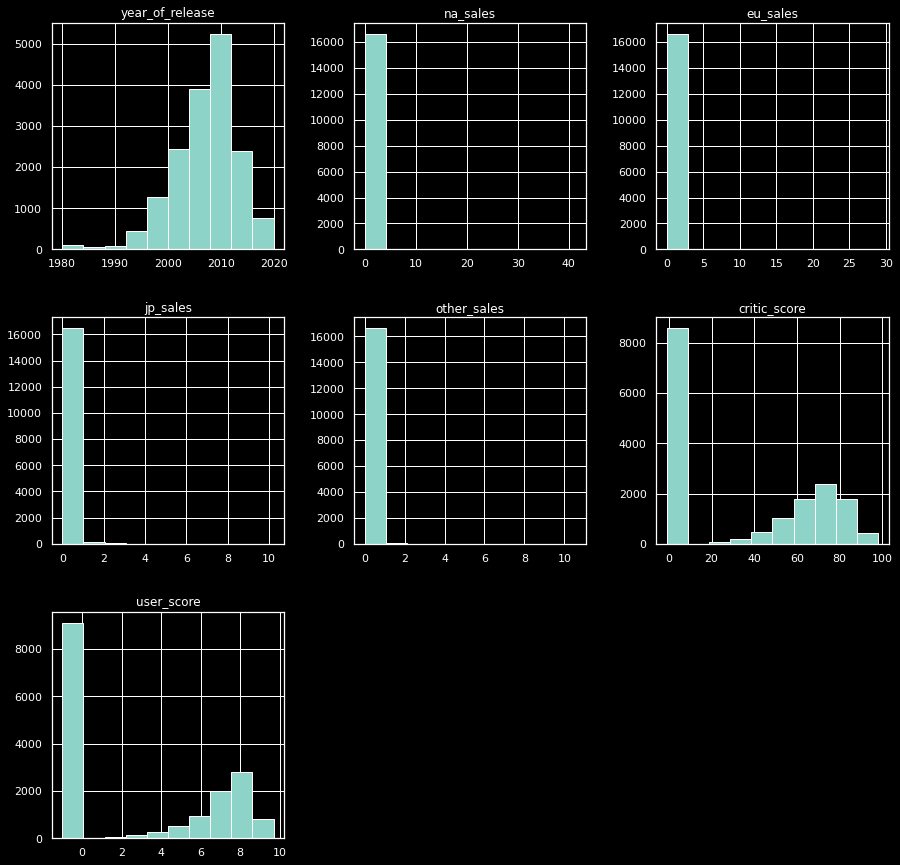

In [ ]:
df.hist(figsize=(15,15));

### Вывод ### 
    1. Названия столбцов были приведены к нижнему регистру.
    2. Пропуски были заполнены. Принято решение ничего не удалять, даже из малого количества информации можно что-то вытянуть.
    3. Принято решение рассматривать значение 'tbd' как пропуск.
    4. Изменены форматы столбцов на более подходящие для работы.
    5. Полные дубликаты не обнаружены. Частичных искать можно только среди названий игр, но нет смысла так как их будет множество,   
    но с различиями по платформам и годам выпуска.
    6. В ходе предварительного осмотра гистограмм обнаруженно, что большинство значений продаж находятся около нуля, но редкие доходят и до 80.


## Добавление столбцов ##  
  
  Добавим столбец с общими продажами

In [ ]:
df['all_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,no_info,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,no_info,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,no_info,0.01
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,no_info,0.01
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,no_info,0.01
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,no_info,0.01


# Исследовательский Анализ #

## Выпуск игр по годам ##

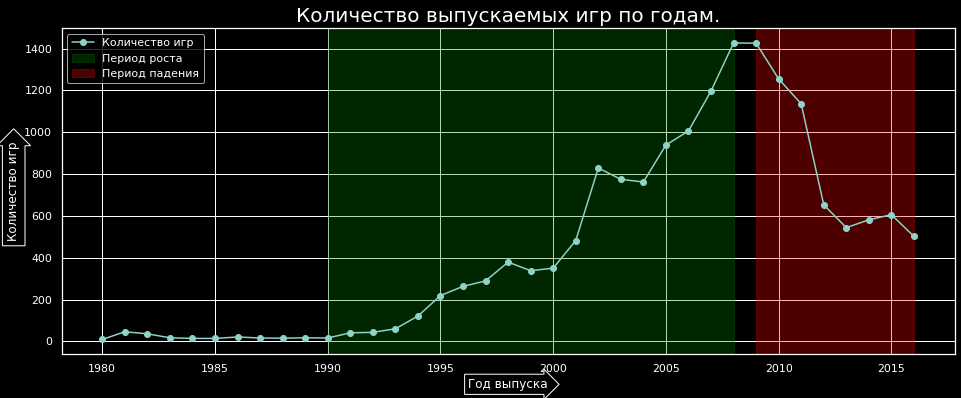

In [ ]:
plt.figure(figsize=(16, 6))
plt.title('Количество выпускаемых игр по годам.', fontsize=20)
plt.ylabel('Количество игр', bbox = {'boxstyle': 'rarrow',
                      'pad': 0.4,
                      'facecolor': 'black',
                      'edgecolor': 'white',
                      'linewidth': 1})
plt.xlabel('Год выпуска', bbox = {'boxstyle': 'rarrow',
                      'pad': 0.3,
                      'facecolor': 'black',
                      'edgecolor': 'white',
                      'linewidth': 1})
plt.plot(df[df['year_of_release'] != 2020].groupby('year_of_release')['name'].count(), 'o-', label='Количество игр', alpha=1)
plt.axvspan(1990, 2008, color='green', label='Период роста', alpha=0.3)
plt.axvspan(2009, 2016, color='red', label='Период падения', alpha=0.3)
plt.grid(True)
plt.legend();

### Вывод ###


- Количество выпускаемых игр с 1980 по 1990 не увеличивалось. Компьютерная эра и игровая индустрия находились на этапе зарождения. Устройства не были повсеместно распространенны, отсутствовали в домах и использовались исключительно для работы.
 - Количество выпускаемых игр с 1990 по 2000 постепенно увеличивается и доходит до отметки ~400 игр в год. Начинается распространение компьютеров и приставок, у производителей игр появляется коммерческий интерес.
 - Количество выпускаемых игр с 2000 по 2009 стремительно растет и достигает выпуска более 1400 игр в год. Происходит повсеместная компьютеризация. Стремительно улучшаются технологии. Наступает настоящий расцвет видеоигр.
 - Количество выпускаемых игр с 2009 по 2016 стремительно снижается и опускается до отметки ~500 игр в год. Игровые студии-гиганты заняли нишу и задали планку качества выпускаемых игр, теперь работа над выпуском игры занимает несколько лет. Начался мировой экономический кризис. Количество покупателей уменьшилось, студии поменьше закрылись или были выкуплены.


## Продажи по платформам ##

In [ ]:
display(df[(df['platform'] == 'DS') & (df['year_of_release'] == 1985)])
df.loc[15955] = df.loc[15955].replace(1985, 2010)
df[(df['platform'] == 'DS') & (df['name'] == 'Strongest Tokyo University Shogi DS')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
15955,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,-1.0,-1.0,no_info,0.02


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
15955,Strongest Tokyo University Shogi DS,DS,2010,Action,0.0,0.0,0.02,0.0,-1.0,-1.0,no_info,0.02


In [ ]:
t = df.groupby('platform')['all_sales'].sum().sort_values(ascending=False).head(7)

    

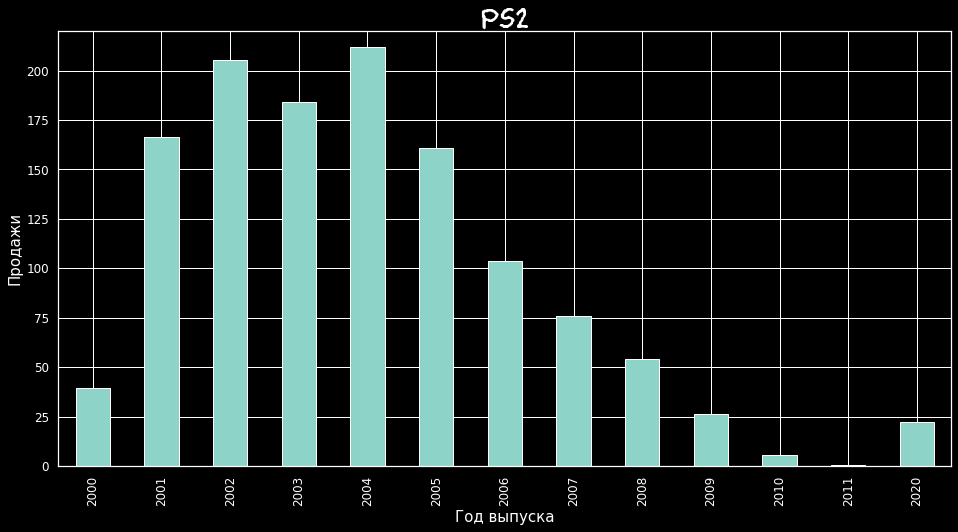

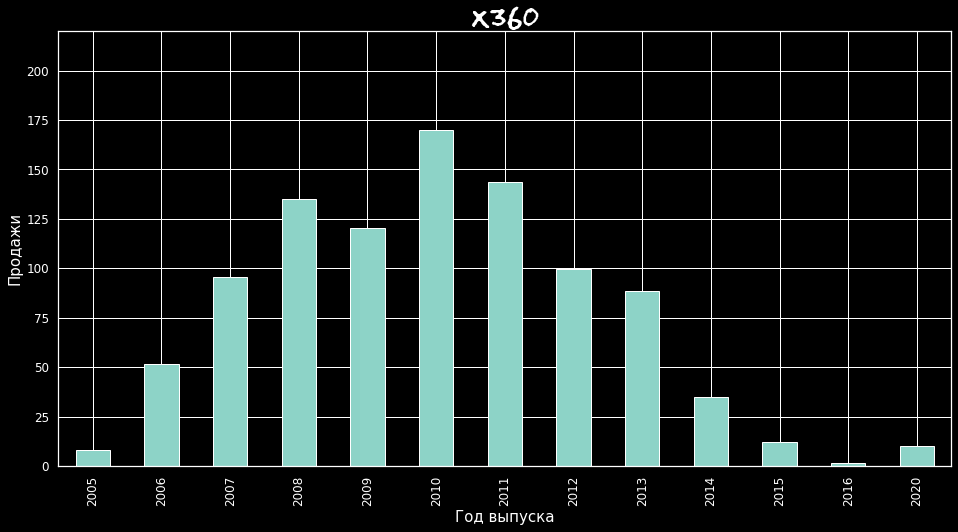

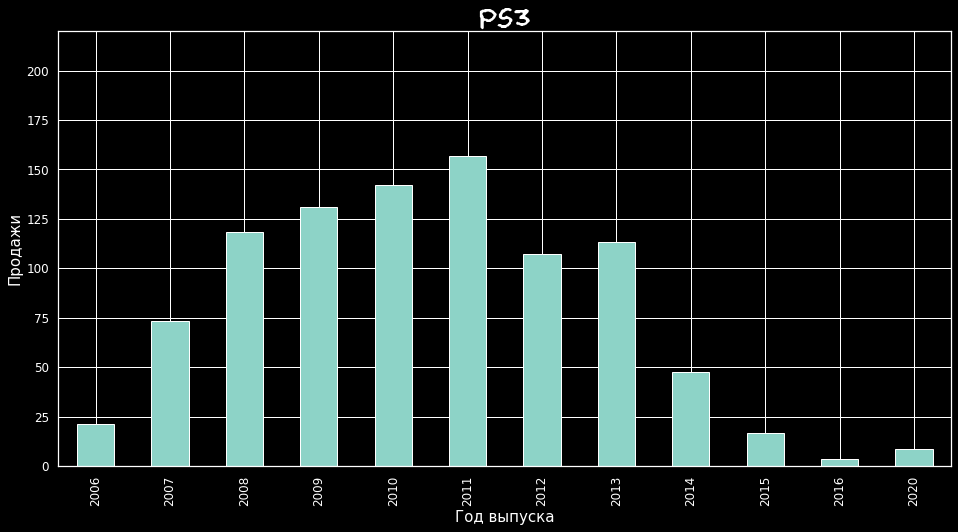

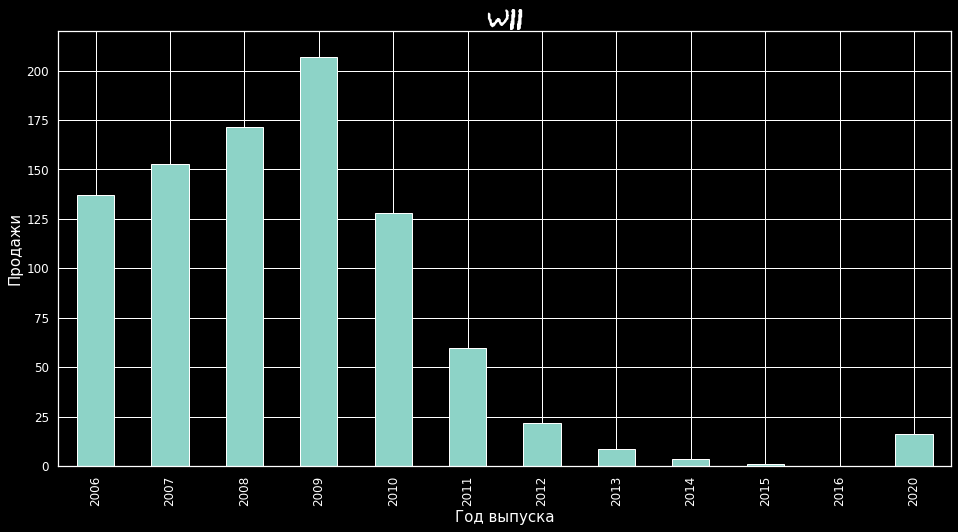

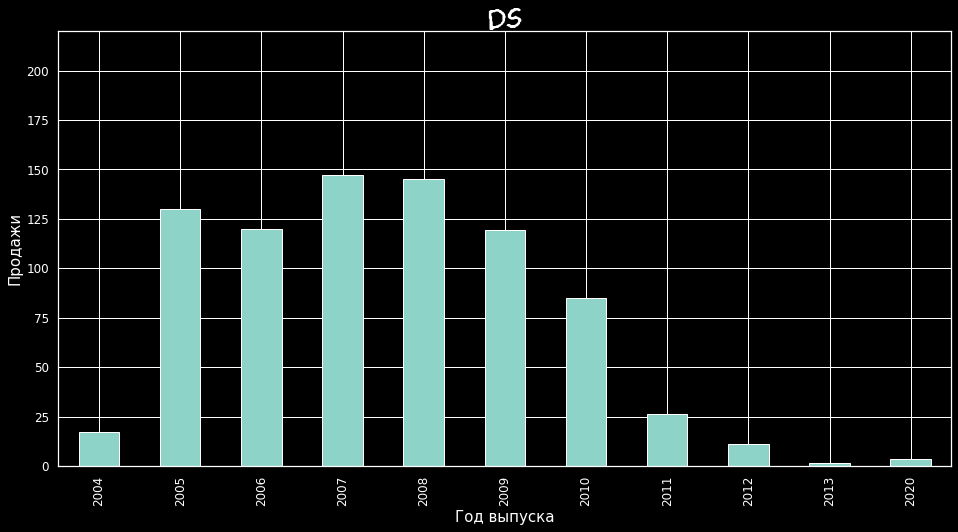

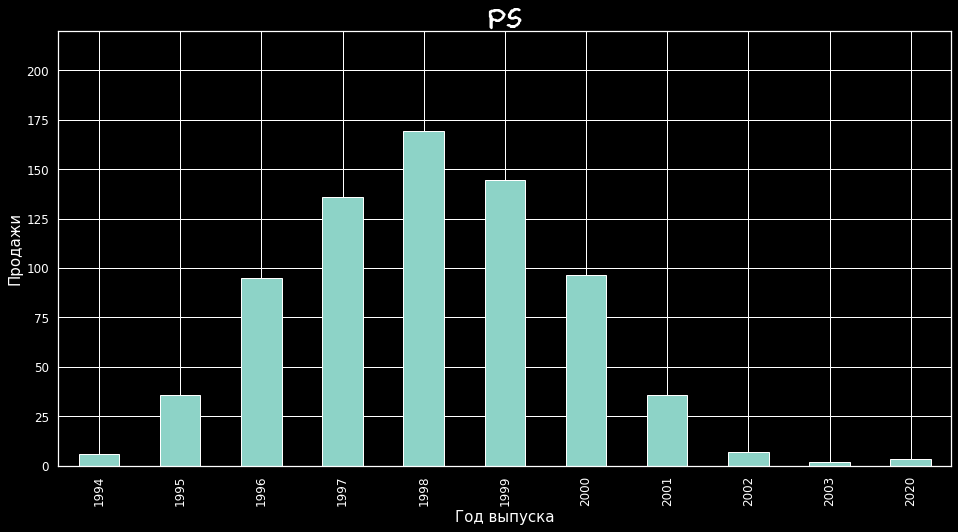

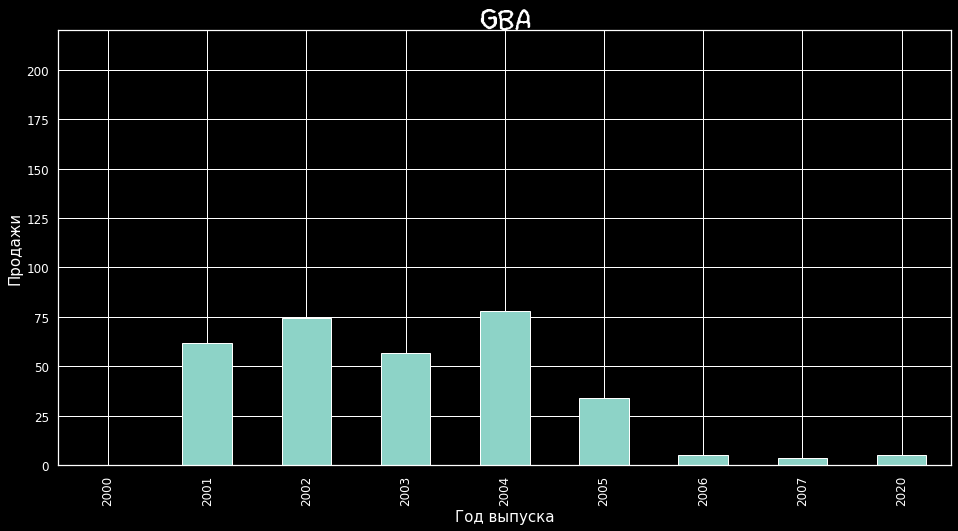

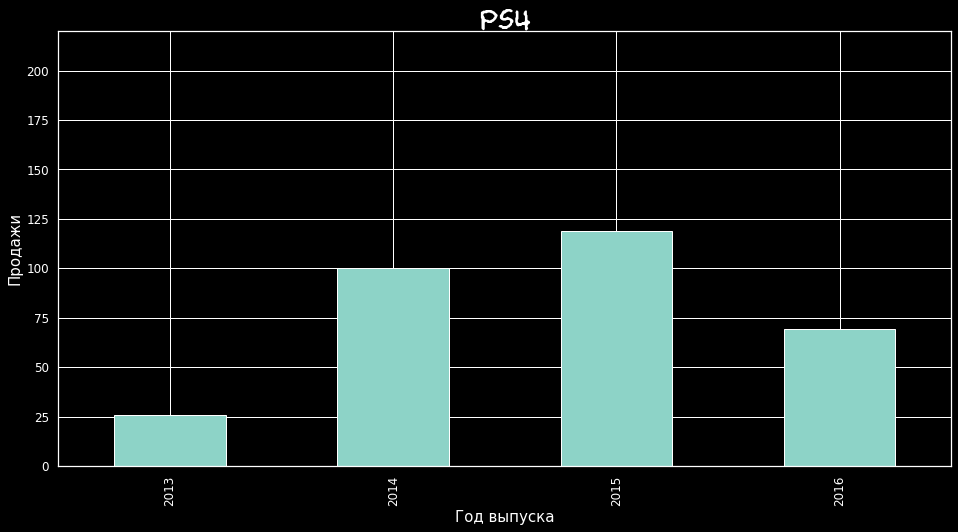

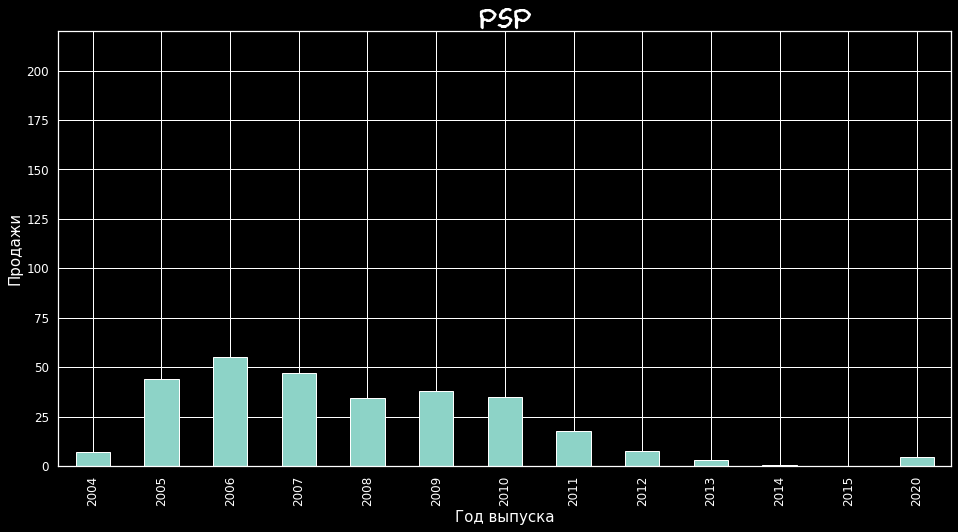

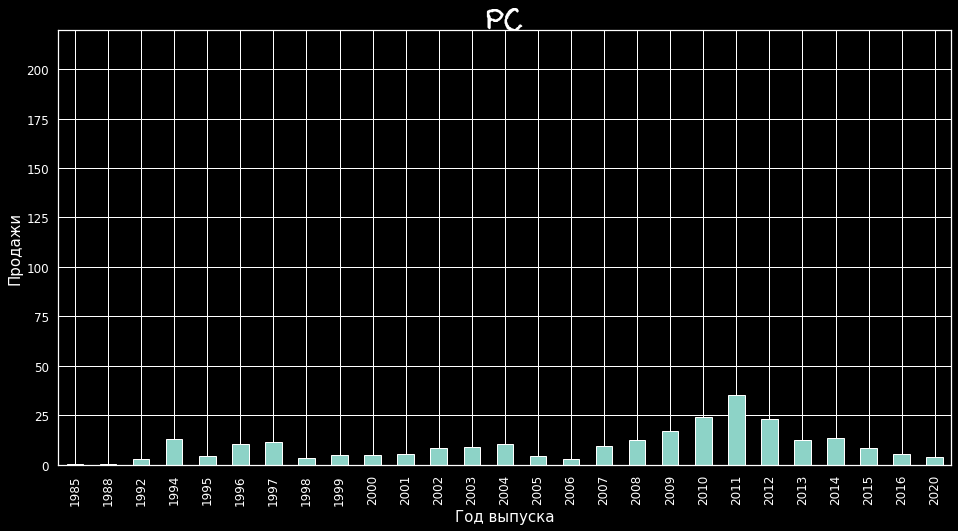

In [ ]:
t = (df
     .pivot_table(index='platform', columns='year_of_release', values='all_sales', aggfunc='sum', margins=True)
     .sort_values(by='All', ascending=False)
     .drop(labels='All', axis=0)
     .drop(labels='All', axis=1)
     .head(10)
    )
for i in t.index:    
    ti = t.loc[i].dropna().plot(kind='bar', figsize=(16, 8), fontsize= 12, grid=True, ylim=(0, 220))
    ti.set_title(i, fontfamily = 'fantasy',fontstyle = 'oblique',fontsize = 30)
    ti.set_xlabel('Год выпуска',fontsize = 15)
    ti.set_ylabel('Продажи',fontsize = 15)
    
    plt.show()




Выделяется только PS4 и PC, остальные к 2016 уже не актуальны. Также выделяется и период с 2013. Посмотрим глубже.

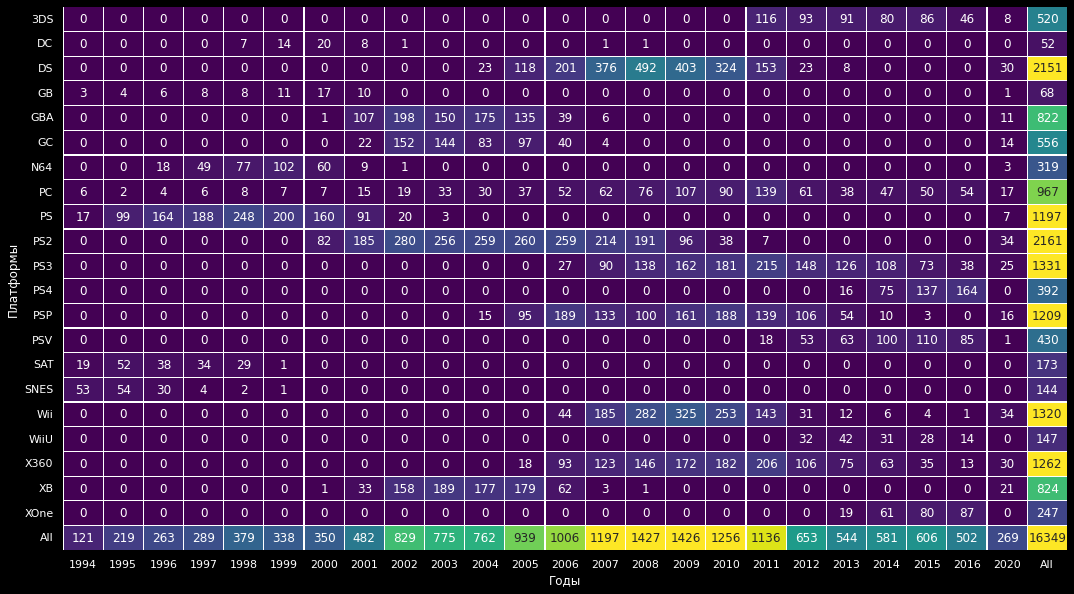

In [ ]:
t = df[df['year_of_release'] > 1993].pivot_table(index='platform', 
                                      values='all_sales', 
                                      columns = 'year_of_release', 
                                      aggfunc = 'count', 
                                      fill_value=0, 
                                      margins=True).reset_index()
#t = t[:-1]
platform_releases_heatmap = t.query('All > 50').set_index('platform')
plt.figure(figsize=(18, 10))
sns.heatmap(platform_releases_heatmap, annot=True, fmt="d", cmap='viridis', cbar=False, robust=True, linewidths=.2)
plt.xlabel('Годы')
plt.ylabel('Платформы')
plt.show() 

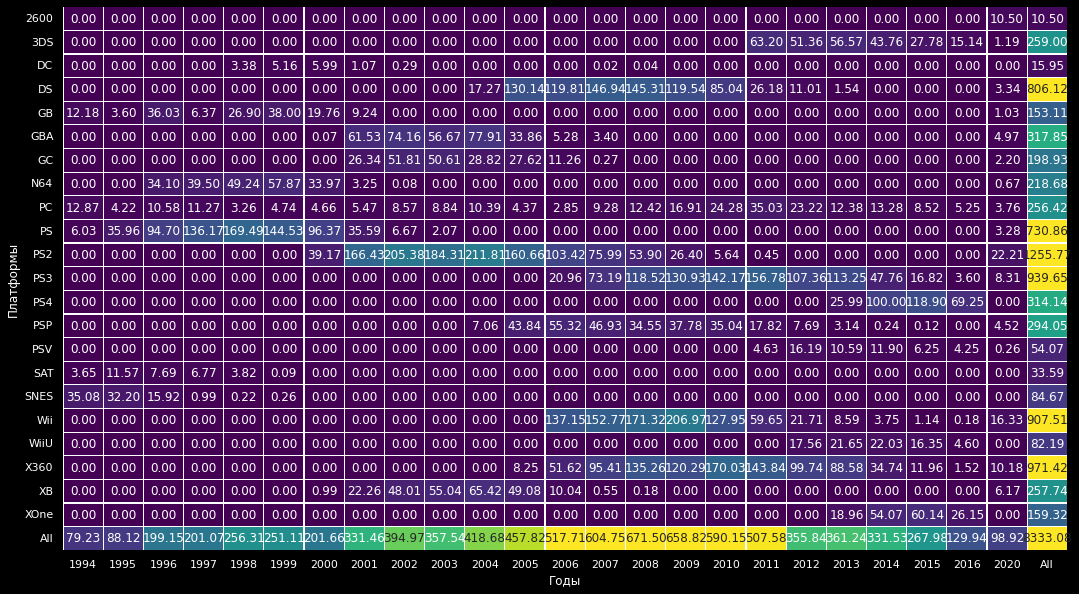

In [ ]:
t = df[df['year_of_release'] > 1993].pivot_table(index='platform', 
                                      values='all_sales', 
                                      columns = 'year_of_release', 
                                      aggfunc = 'sum', 
                                      fill_value=0, 
                                      margins=True).reset_index()
#t = t[:-1] # если отключить, можно посмотреть итоги по годам
platform_sales_heatmap = t.query('All > 10').set_index('platform')
plt.figure(figsize=(18, 10))
sns.heatmap(platform_sales_heatmap, annot=True, fmt=".2f", cmap='viridis', cbar=False, robust=True, linewidths=.2)
plt.xlabel('Годы')
plt.ylabel('Платформы')
plt.show()


    Четко просматривается следующее:
1. Прошлые поколения PS хорошо себя показали, PS4 на подъеме, да еще не прожила и половины своего коммерческого срока жизни.
2. Так же и с линейкой X-box, неплохая история, новая модель с перспективами.
3. Немного слабее, но похожее с моделями Wii.
4. Слабый но вечно стабильный PC.
5. 3DS уже заметно убывает.
6. В 2013 затишье в выпуске игр, но не в продажах.
7. В 2013 вышли PS4 и XOne.
8. С 2006 по 2011 высокая активность, в 2012 начинается спад.
9. Неизвестные значения(2020) могли бы иметь легкое влияние, но не решающее.


In [ ]:
print("Чаще всего платформы живут:",\
      df[(df['year_of_release'] != 2020) & (df['platform'] != 'PC')].groupby('platform')['year_of_release'].nunique().mode()[0],\
      "лет, несомненно самые популярные.")
print("В среднем платформы живут ",\
      int(df[(df['year_of_release'] != 2020) & (df['platform'] != 'PC')].groupby('platform')['year_of_release'].nunique()\
          .mean().round())," лет, наверняка статистику тянут вниз никому неизвестные платформы, не ставшие популярными и   \
      прожившие мало.", sep='')



Чаще всего платформы живут: 10 лет, несомненно самые популярные.
В среднем платформы живут 7 лет, наверняка статистику тянут вниз никому неизвестные платформы, не ставшие популярными и         прожившие мало.


### Вывод ###


Изучив данные о продажах с разных сторон мы смогли оценить состояние рынка, популярность различных платформ и их коммерческий(рыночный) срок жизни.
В связи с проведенным выше исследованием, примем что средний срок жизни обычной платформы составляет около 10 лет, популярной около 12.
Видно что большинство пиков продаж остались позади 2011, стоит смотреть на те платформы что вышли не более 5 лет назад. Хотелось бы принять 2012 за точку отсчета актуального периода но учитывая длительность периода жизни платформ стоит сдвинуть эту точку на 1-2 года вперед. Многие платформы уже отживают свой срок. Следует отметить, что согласно изученным данным можно предполагать появление новых популярных платформ через 3-4 года. В 2013 году просматривается затишье, выход новых платформ.
Таким образом предлагаю принять за точку отсчета 2013 год. 


## Платформы лидирующие по продажам ##

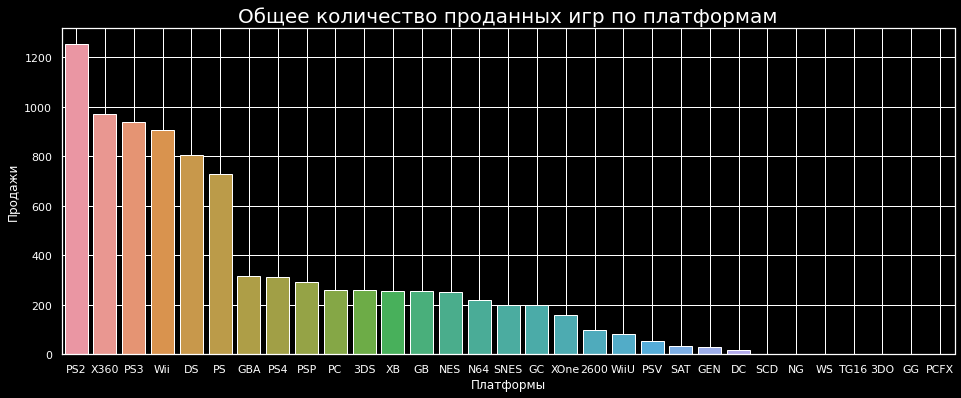

In [ ]:
t = df.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values(by='all_sales', ascending=False)
plt.figure(figsize=(16, 6))
plt.title('Общее количество проданных игр по платформам', fontsize=20)
sns.barplot(x=t.index, y=t['all_sales'])
plt.ylabel('Продажи', fontsize=12)
plt.xlabel('Платформы', fontsize=12)
plt.grid(True);

Видно что линейки PS, X-box, Wii, DS хорошо себя показывают. Новые модели еще не достигли высоких результатов. Значит все впереди, их потенциал высок.



In [ ]:
df[df['year_of_release'] > 2012].groupby('platform')['all_sales'].sum().sort_values(ascending=False).head(10)

platform
PS4     314.14
PS3     189.74
XOne    159.32
X360    146.98
3DS     144.44
WiiU     64.63
PC       43.19
PSV      33.25
Wii      29.99
PS2      22.21
Name: all_sales, dtype: float64

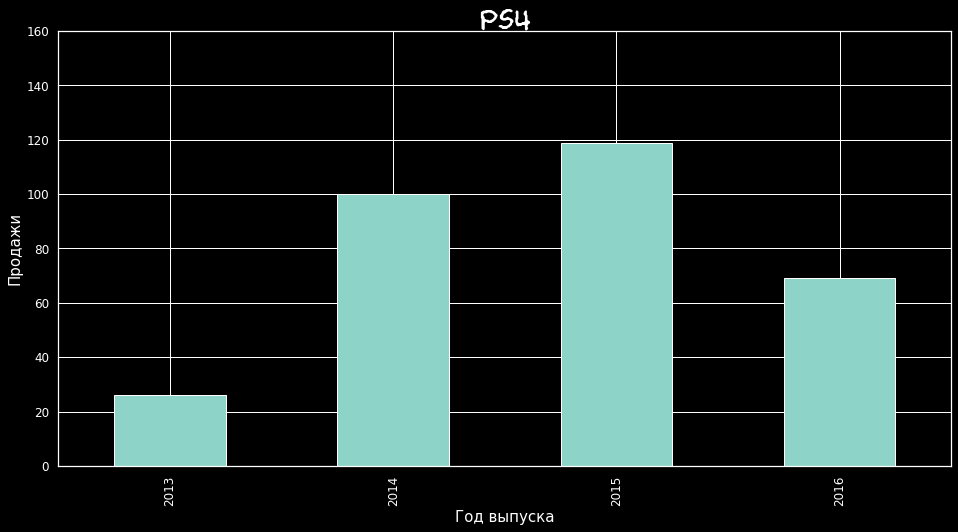

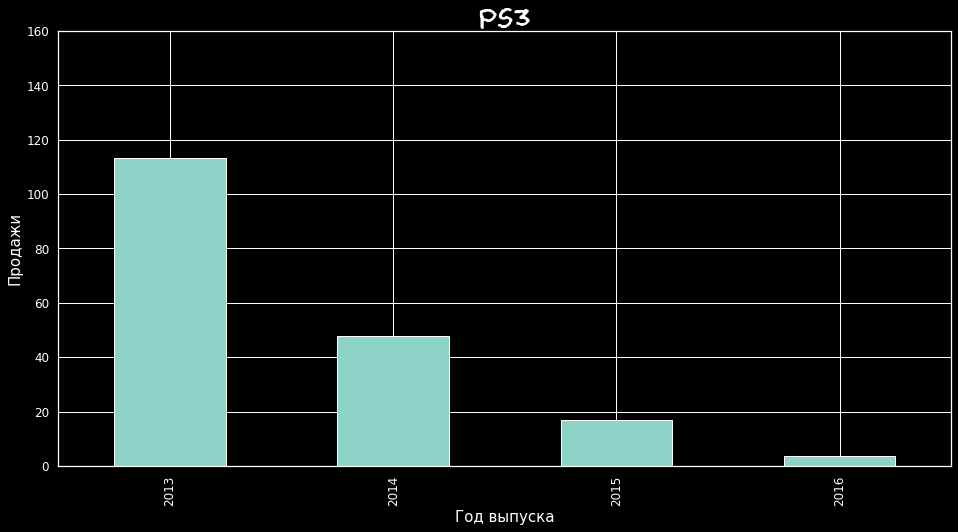

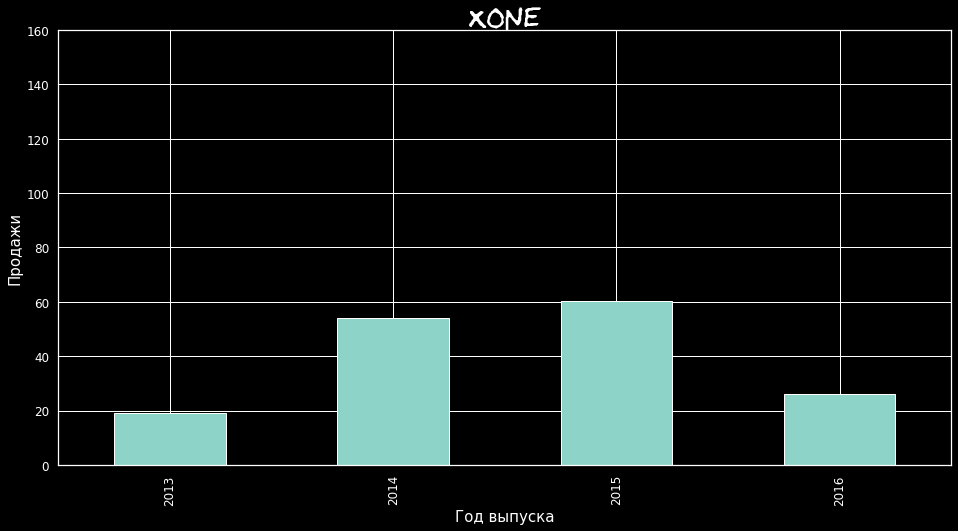

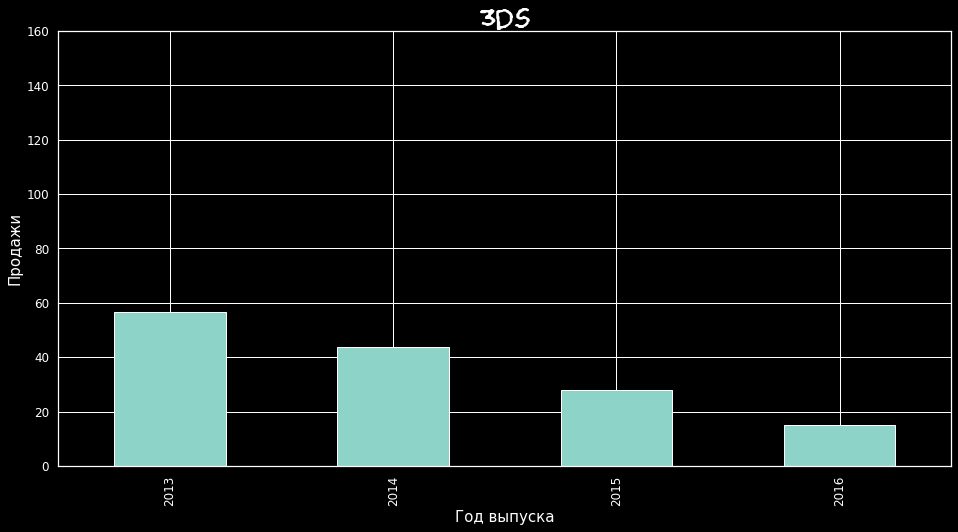

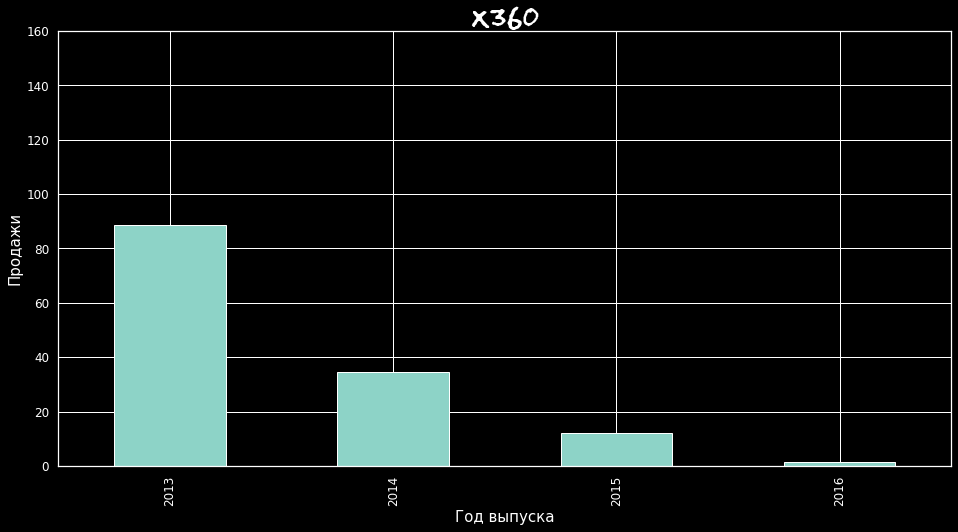

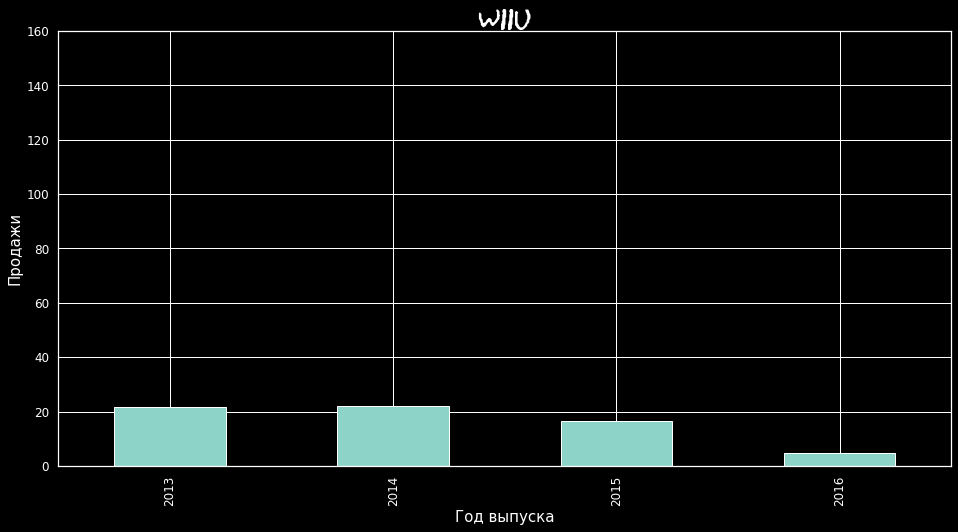

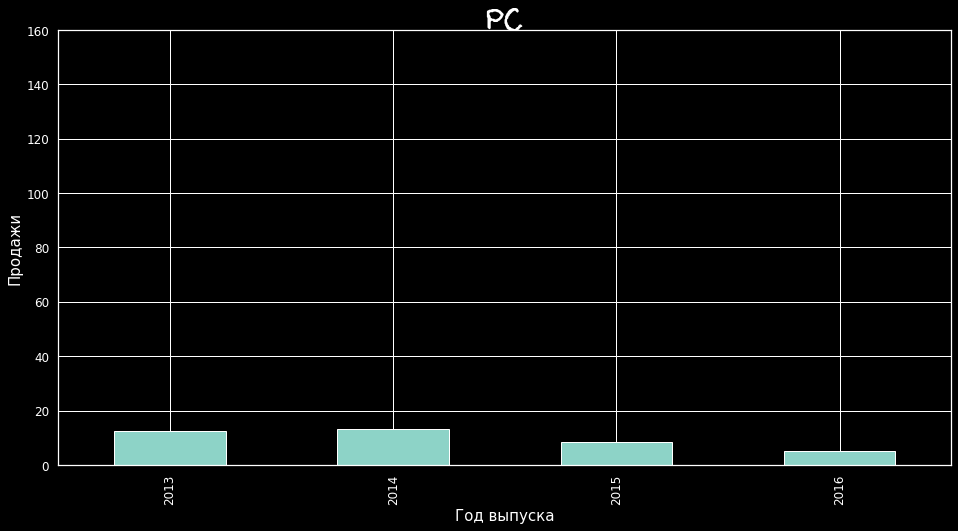

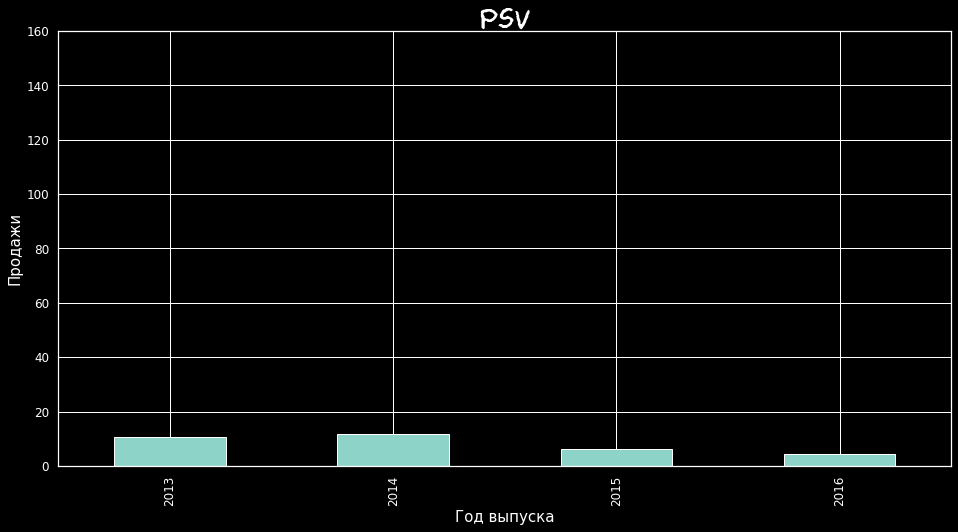

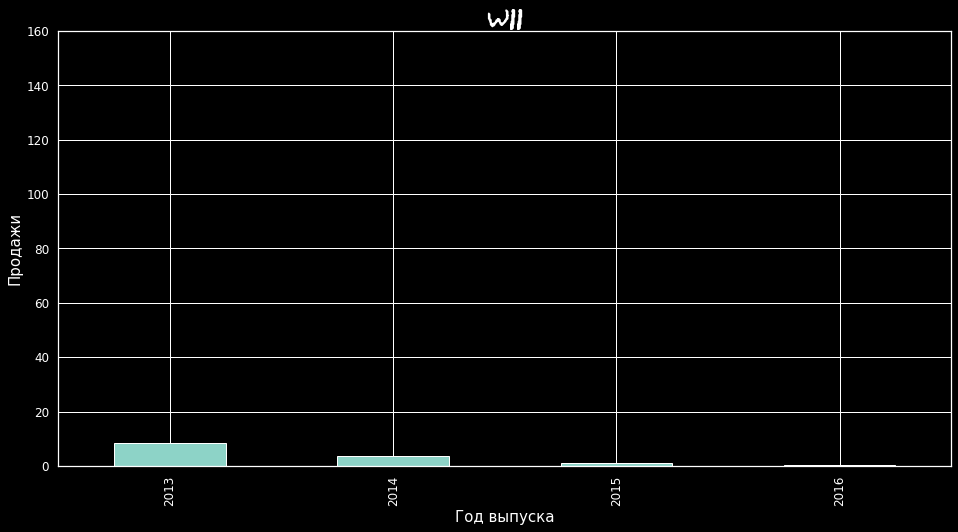

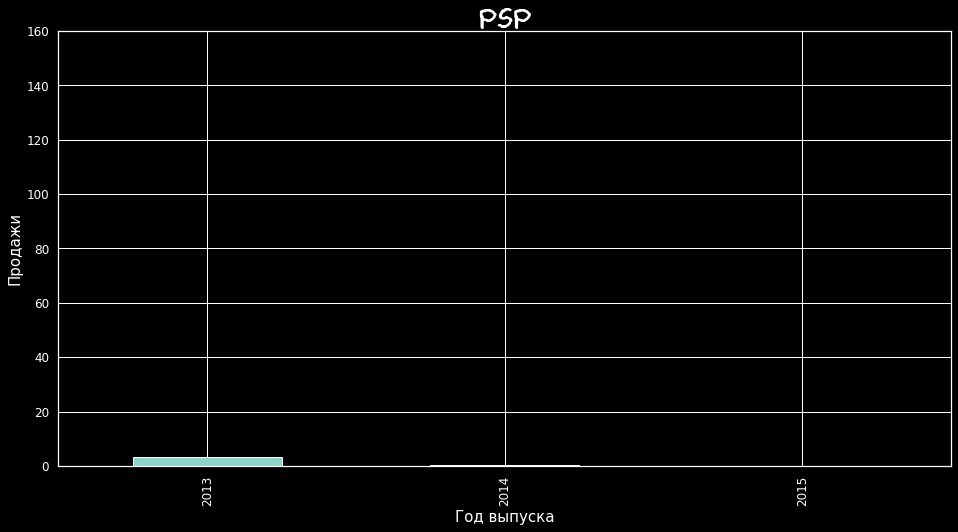

In [ ]:
t = (df[(df['year_of_release'] > 2012) & (df['year_of_release'] != 2020)]
     .pivot_table(index='platform', columns='year_of_release', values='all_sales', aggfunc='sum', margins=True)
     .sort_values(by='All', ascending=False)
     .drop(labels='All', axis=0)
     .drop(labels='All', axis=1)
     .head(10)
    )
for i in t.index:    
    ti = t.loc[i].dropna().plot(kind='bar', figsize=(16, 8), fontsize= 12, grid=True, ylim=(0, 160))
    ti.set_title(i, fontfamily = 'fantasy',fontstyle = 'oblique',fontsize = 30)
    ti.set_xlabel('Год выпуска',fontsize = 15)
    ti.set_ylabel('Продажи',fontsize = 15)
    
    plt.show()

### Вывод ###


Предположим что данные за 2016 год неполные. Если допустить это, то представляется что продажи PS4 и XOne растут, WiiU слегка покачиваясь держится на одном уровне как и PC. Отбросив данное предположение, отметим что все указанные платформы имеют потенциал.


## Продажи по актуальным данным ##

In [ ]:
#choosens = ['PS4', 'WiiU', 'XOne', 'PC']
df_filltered = df[(df['year_of_release'] > 2012) & (df['year_of_release'] != 2020)].reset_index(drop=True)
#df_filltered = df_filltered[df_filltered['platform'].isin(choosens)].reset_index(drop=True)
df_filltered


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,no_info,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,no_info,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
2228,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,no_info,0.01
2229,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,no_info,0.01
2230,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,no_info,0.01
2231,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,no_info,0.01


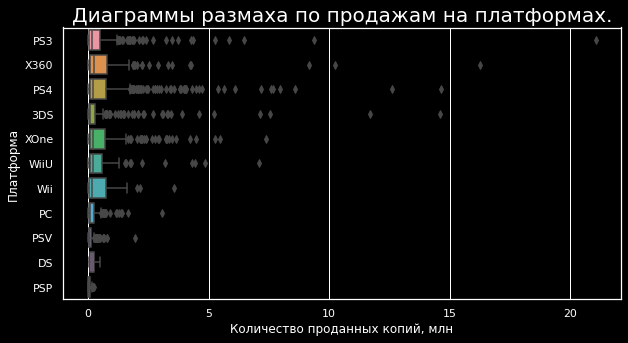

In [ ]:
sns.boxplot(x='all_sales', y='platform', data=df_filltered, orient='h')
#plt.xlim(0, 2)
sns.set(rc = {'figure.figsize':(15, 13)})
plt.title('Диаграммы размаха по продажам на платформах.', fontsize=20)
plt.xlabel('Количество проданных копий, млн', fontsize=12)
plt.ylabel('Платформа', fontsize=12);
# Запускать эту ячейку кода дважды. Нормальный размер почему-то устанавливается только со второго запуска

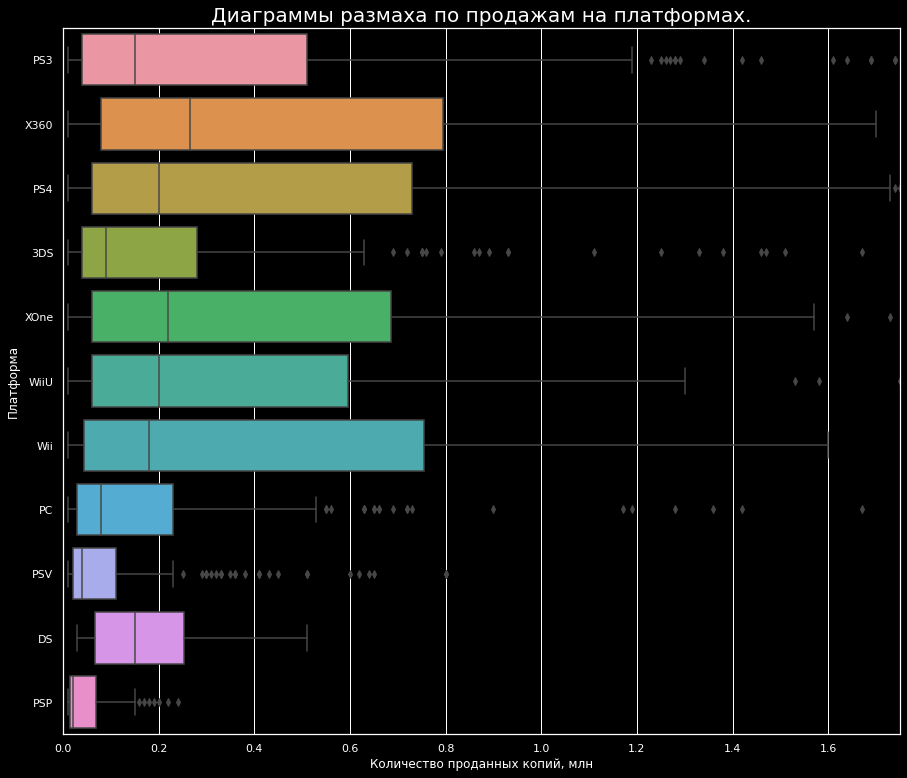

In [ ]:
plt.style.use('dark_background')
sns.boxplot(x='all_sales', y='platform', data=df_filltered, orient='h')
plt.xlim(0, 1.75)
sns.set(rc = {'figure.figsize':(15, 13)})
plt.title('Диаграммы размаха по продажам на платформах.', fontsize=20)
plt.xlabel('Количество проданных копий, млн', fontsize=12)
plt.ylabel('Платформа', fontsize=12);
# Запускать эту ячейку кода дважды. Нормальный размер почему-то устанавливается только со второго запуска

In [ ]:
df_filltered.groupby(by='platform')['all_sales'].median().sort_values(ascending=False)

platform
X360    0.265
XOne    0.220
PS4     0.200
WiiU    0.200
Wii     0.180
DS      0.150
PS3     0.150
3DS     0.090
PC      0.080
PSV     0.040
PSP     0.020
Name: all_sales, dtype: float64

**На диаграмме мы видим:**   
Самые большие выбросы у PS3, X360, PS4, 3DS, XOne, WiiU. Вероятно это очень успешные игры.   
Самые большие боксы у X360, Wii, PS4, XOne, WiiU   
Самые большие верхние значения в пределах нормы у PS4, X360, Wii, XOne, WiiU, PS3    
Самые большие медианы у X360, XOne, PS4, WiiU   
Среди тех что встречаются и еще живы можно отметить PS4, XOne, WiiU   


## Зависимость продаж от оценок ##

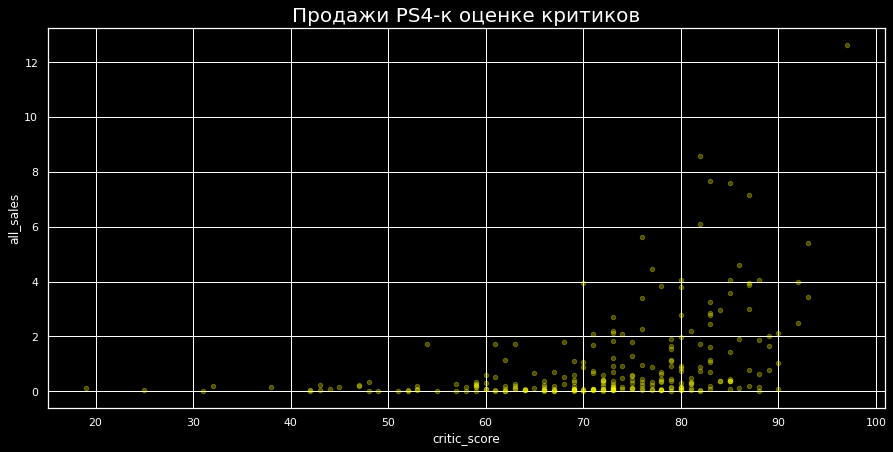

Корреляция продаж PS4 к оценке критиков равна: 0.22652606614612347


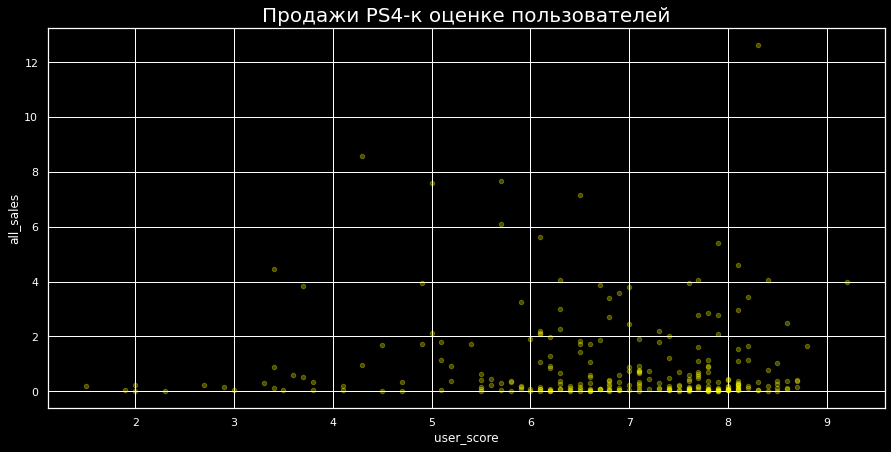

Корреляция продаж PS4 к оценке пользователей равна: 0.1159614931286009


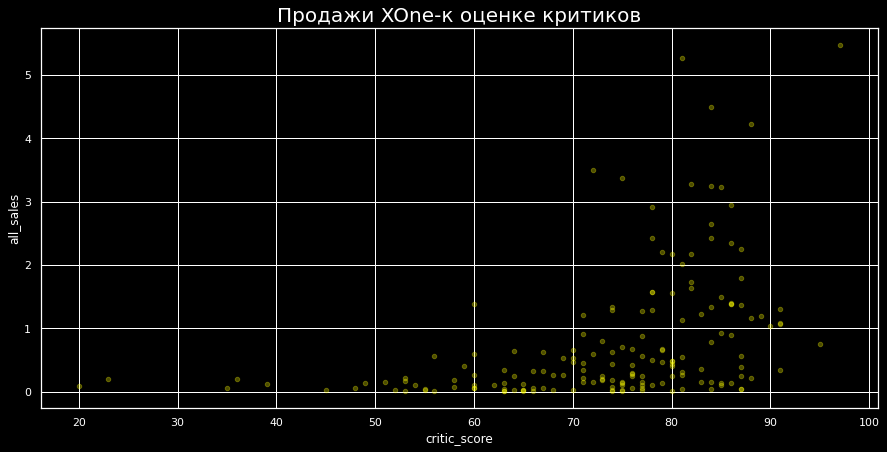

Корреляция продаж XOne к оценке критиков равна: 0.27378217261702115


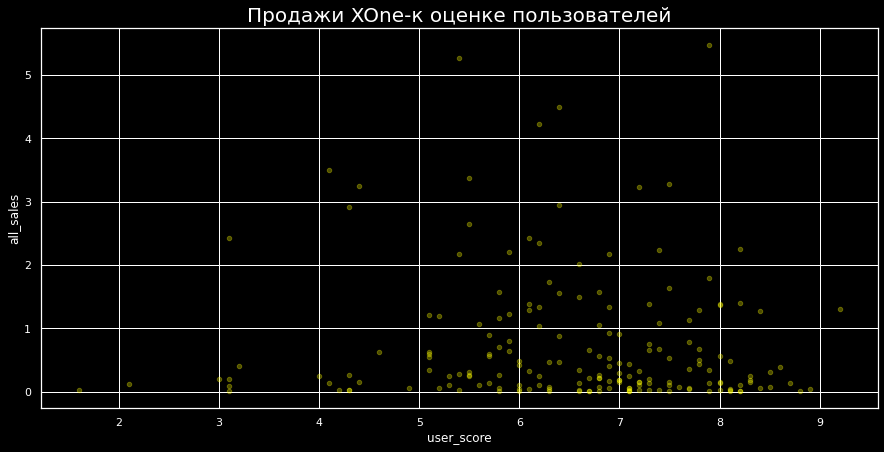

Корреляция продаж XOne к оценке пользователей равна: 0.12171152458232885


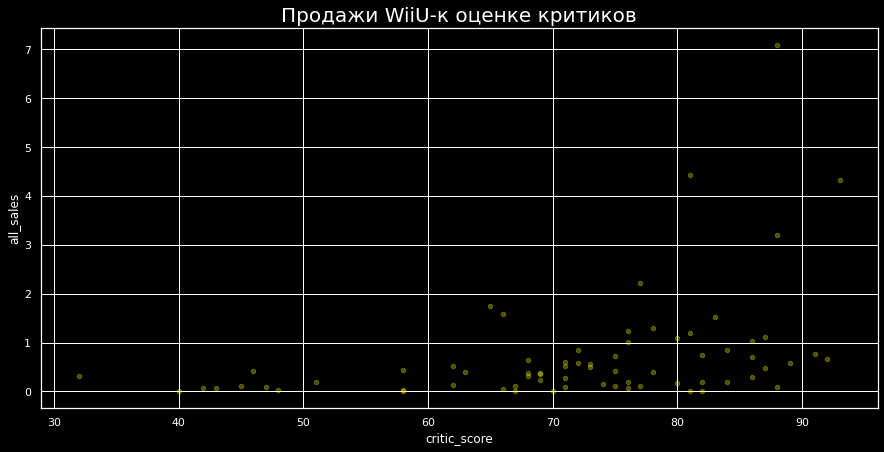

Корреляция продаж WiiU к оценке критиков равна: 0.29318140014748445


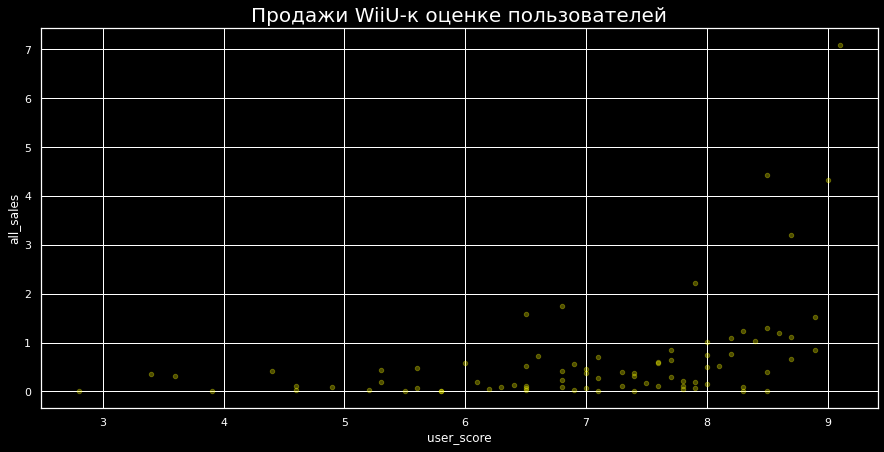

Корреляция продаж WiiU к оценке пользователей равна: 0.24040448001166204


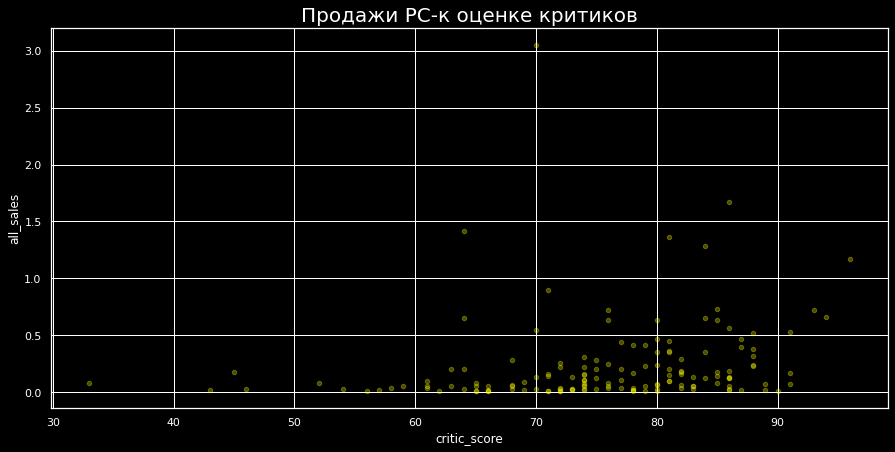

Корреляция продаж PC к оценке критиков равна: 0.18520539415698067


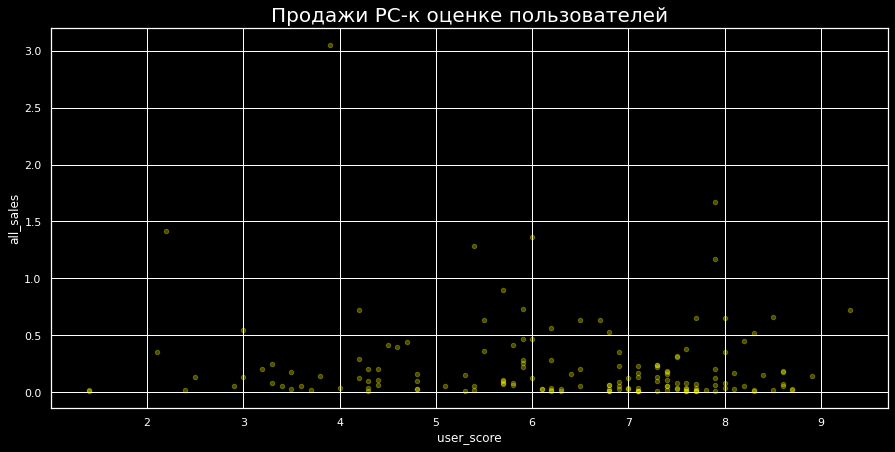

Корреляция продаж PC к оценке пользователей равна: 0.04949169498767851


In [ ]:
plt.style.use('dark_background')
choosens = ['PS4', 'WiiU', 'XOne', 'PC']
df_filltered_pl = df_filltered[df_filltered['platform'].isin(choosens)].reset_index(drop=True)
for i in df_filltered_pl['platform'].unique():
    t = df_filltered_pl.query('platform == @i')
    for j in t.columns[8:10]:
        if j == 'critic_score':
            a = 'к оценке критиков'
        else:
            a = 'к оценке пользователей'
        tj = t[t[j] != -1].plot(kind='scatter', x= j, y='all_sales', alpha=.3, color='yellow', figsize=(15,7))
        tj.set_title('Продажи '+i+'-'+a, fontsize=20)
        plt.show()
       
        print(f'Корреляция продаж {i} {a} равна:', t['all_sales'].corr(t[j]))


### Вывод ###


У PS4 и XOne оценка критиков имеет слабую прямую корреляцию с продажами. Корреляция оценок пользователей и продаж очень мала.

У WiiU влияние отзывов пользователей на продажи такое же как и у критиков. Это явление может иметь ценность для рекламной компании.

У PC влияние пользователей отсутствует, а влияние критиков слабое положительное.

В целом, при прогнозе продаж надежнее полагаться на отзывы критиков.

## Распределение игр по жанрам ##

In [ ]:
t = df_filltered.groupby('genre')[['name', 'all_sales']]\
.agg({'name': "count", 'all_sales': 'sum'})\
.sort_values(by='all_sales', ascending=False)
t

,name,all_sales
genre,,
Action,766,321.87
Shooter,187,232.98
Sports,214,150.65
Role-Playing,292,145.89
Misc,155,62.82
Platform,74,42.63
Racing,85,39.89
Fighting,80,35.31
Adventure,245,23.64


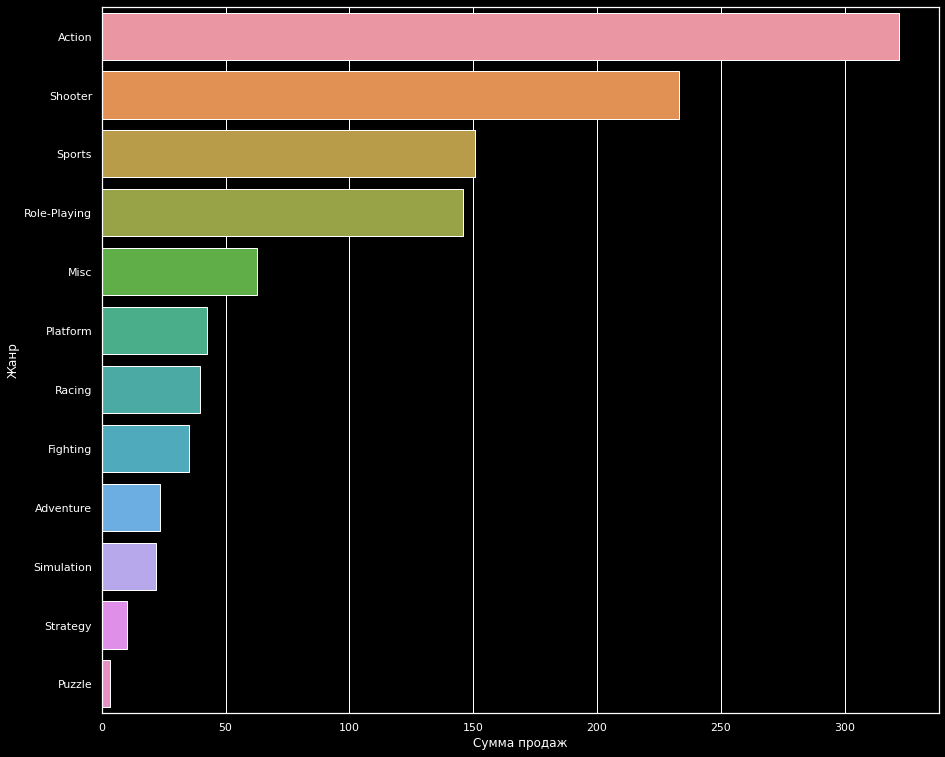

In [ ]:
plt.style.use('dark_background')
sns.barplot(data=t, x='all_sales', y=t.index)
sns.set(rc={'figure.figsize':(10,5)})
plt.xlabel('Сумма продаж')
plt.ylabel('Жанр');
# Здесь тоже размер устанавливается почему-то после 2го запуска ячейки

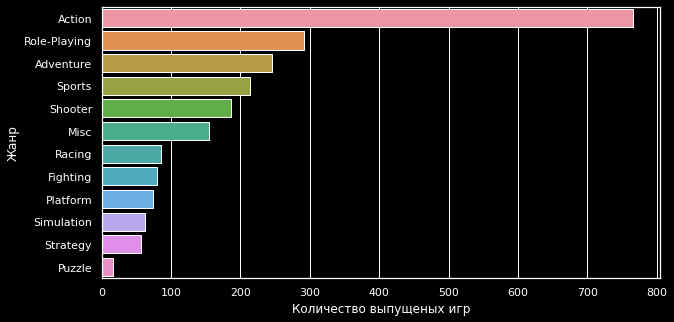

In [ ]:
plt.style.use('dark_background')
t = t.sort_values(by='name', ascending=False)
sns.barplot(data=t, x=t['name'], y=t.index)
sns.set(rc={'figure.figsize':(10,5)})
plt.xlabel('Количество выпущеных игр')
plt.ylabel('Жанр');

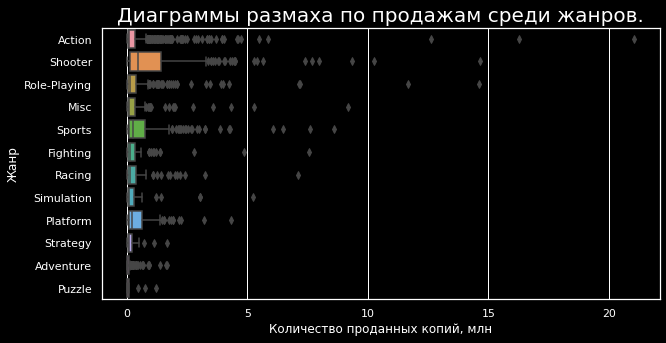

In [ ]:
plt.style.use('dark_background')
sns.boxplot(x='all_sales', y='genre', data=df_filltered, orient='h')
#plt.xlim(0, 1.75)
sns.set(rc = {'figure.figsize':(15, 13)})
plt.title('Диаграммы размаха по продажам среди жанров.', fontsize=20)
plt.xlabel('Количество проданных копий, млн', fontsize=12)
plt.ylabel('Жанр', fontsize=12);

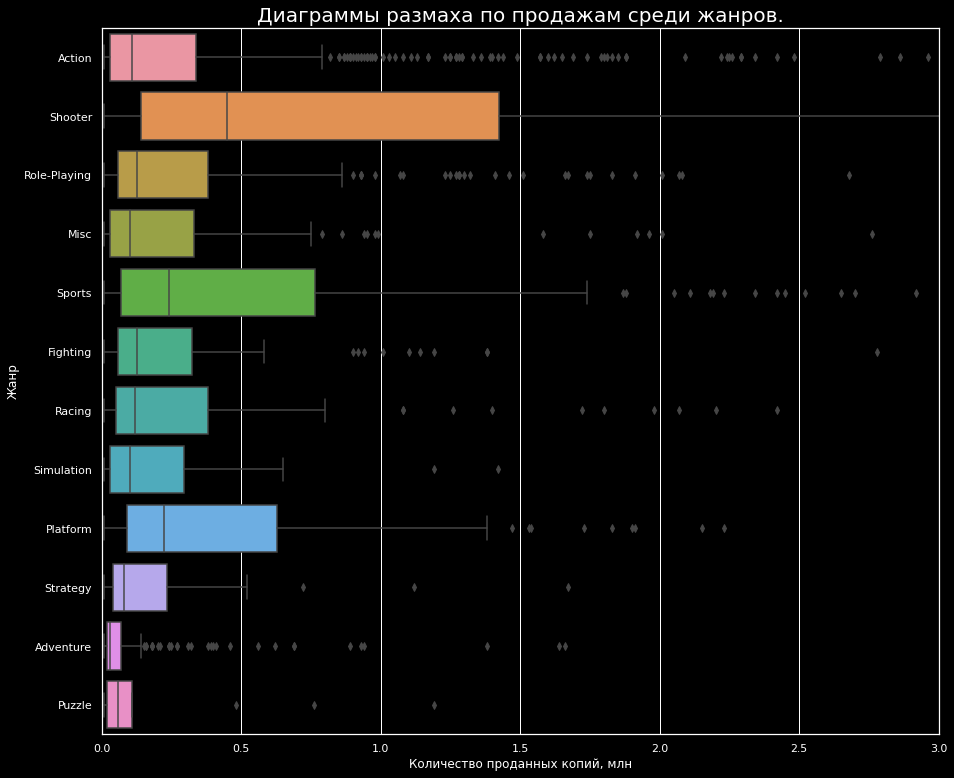

In [ ]:
plt.style.use('dark_background')
sns.boxplot(x='all_sales', y='genre', data=df_filltered, orient='h')
plt.xlim(0, 3)
sns.set(rc = {'figure.figsize':(15, 13)})
plt.title('Диаграммы размаха по продажам среди жанров.', fontsize=20)
plt.xlabel('Количество проданных копий, млн', fontsize=12)
plt.ylabel('Жанр', fontsize=12);

### Вывод ###
  
По барплоту мы видим, что самым популярным жанром среди покупателей является Action, следом за ним идут Shooter, Sports и Role-Playing.  
Диаграммы размаха говорят нам что:  
 - Самые большие выбросы у Action, Shooter, Role-Playing, значит там были очень раскупаемые игры.  
 - Самый большой бокс и самая большая медиана и самый длинный ус у жанра Shooter, значит представители этого жанра стабильно пользуются большей популярностью  
 - Следом за жанром Shooter следует Sports, без выбросов супер-популярных игр, но стабильно популярен  
 - Следом за ним, Platform, что мне кажется удивительным  

Таким образом мы видим что благодаря нескольким супер-популярным играм высоко в рейтинге стоят Action и Role-Playing; Sports и Platform имеют стабильную популярность без выбросов сверх-популярных игр; Жанр Shooter выделяется и стабильной популярностью и выбросами очень популярных игр. 

# Портрет пользователя каждого региона #

## Популярность платформ в каждом отдельно взятом регионе ##

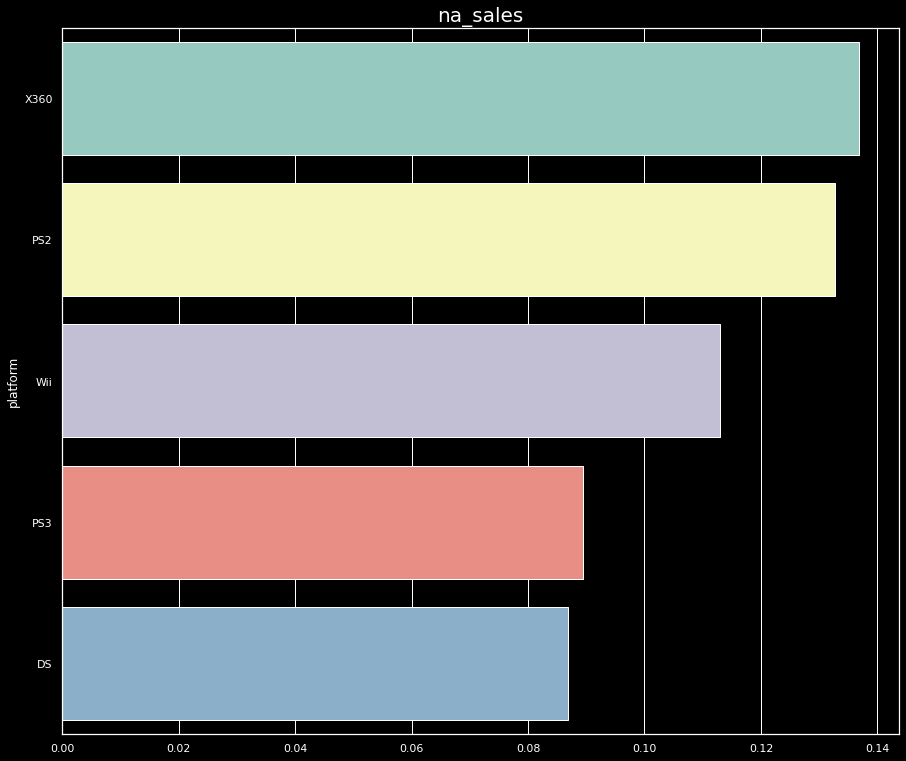

platform
X360    0.136907
PS2     0.132674
Wii     0.112917
PS3     0.089418
DS      0.086898
Name: na_sales, dtype: float64


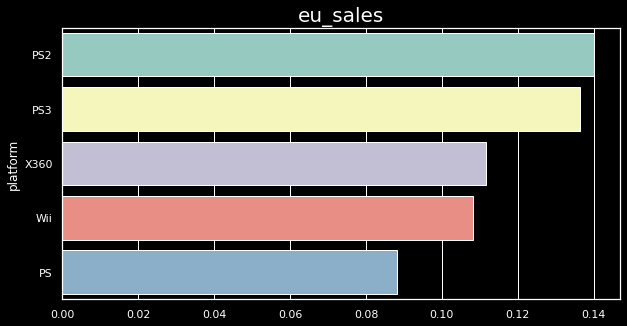

platform
PS2     0.139963
PS3     0.136250
X360    0.111693
Wii     0.108166
PS      0.088118
Name: eu_sales, dtype: float64


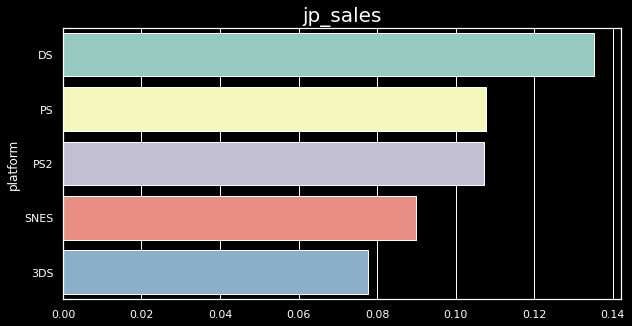

platform
DS      0.135331
PS      0.107774
PS2     0.107296
SNES    0.089838
3DS     0.077597
Name: jp_sales, dtype: float64


In [ ]:

for i in df_filltered.columns[4:7]:
    plt.style.use('dark_background')
    t = ((df.groupby('platform')[i].sum())/df[i].sum())\
    .sort_values(ascending=False)\
    .head(5)
    sns.barplot(y=t.index, x=t.values)
    plt.title(i, fontsize=20)
    sns.set(rc={'figure.figsize':(10,5)})
    plt.show()
    print(t)
    

### Наиболее популярными платформами являются: ###


<b>В Северной Америке:</b>
1.X360 
2.PS2
3.Wii     
4.PS3
5.DS
<b>В Европе:</b>
1.PS2
2.PS3
3.X360
4.Wii
5.PS
<b>в Японии:</b>
1.DS     
2.PS     
3.PS2    
4.SNES   
5.3DS     


## Популярность жанров в каждом отдельно взятом регионе ##

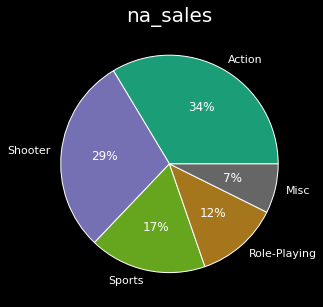

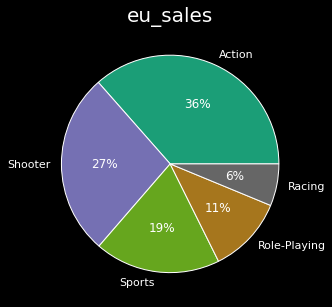

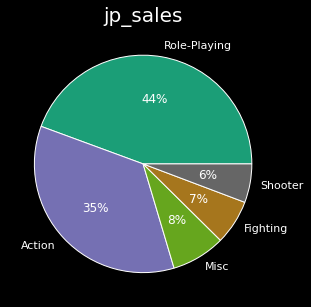

In [ ]:
for i in df_filltered.columns[4:7]:
    plt.style.use('dark_background')
    t = (df_filltered.groupby('genre')[i].sum()\
    .sort_values(ascending=False)\
    .head(5))
    t = t/t.values.sum()
    t.plot(kind='pie', y=t.index, autopct='%1.0f%%', legend=False, radius=1, cmap='Dark2')
    plt.title(i, fontsize=20)
    plt.ylabel(None)
    plt.show()
    print()

### Наиболее популярными жанрами являются: ###


<b>В Северной Америке:</b>  
1.Action  
2.Shooter  
3.Sports     
4.Role-Playing  
5.Misc  
<b>В Европе:</b>  
1.Action  
2.Shooter  
3.Sports  
4.Role-Playing  
5.Racing  
<b>в Японии:</b>  
1.Role-Playing  
2.Action       
3.Misc    
4.Fighting   
5.Shooter     


## Влияние рейтинга на продажи в каждом отдельно взятом регионе ##

rating
M          165.21
no_info     89.42
E           79.05
E10+        54.24
T           49.79
Name: na_sales, dtype: float64

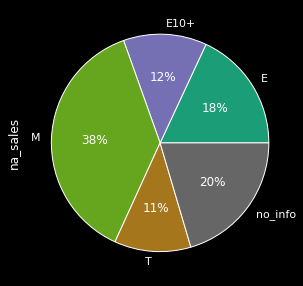

In [ ]:
plt.style.use('dark_background')
df_filltered.groupby('rating').sum().plot(kind='pie', y='na_sales', autopct='%1.0f%%', legend=False, radius=1, cmap='Dark2')
df_filltered.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head(5)

rating
M          145.32
E           83.36
no_info     78.91
E10+        42.69
T           41.95
Name: eu_sales, dtype: float64

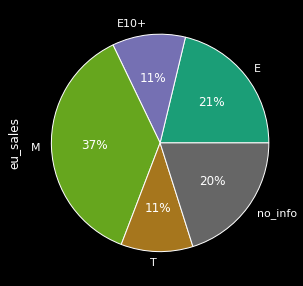

In [ ]:
df_filltered.groupby('rating').sum().plot(kind='pie', y='eu_sales', autopct='%1.0f%%', legend=False, radius=1, cmap='Dark2')
df_filltered.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head(5)

rating
no_info    85.05
T          20.59
E          15.14
M          14.11
E10+        5.89
Name: jp_sales, dtype: float64

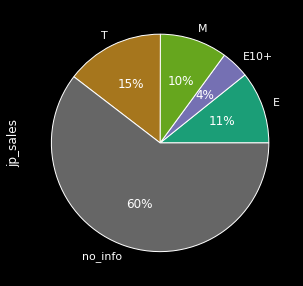

In [ ]:
df_filltered.groupby('rating').sum().plot(kind='pie', y='jp_sales', autopct='%1.0f%%', legend=False, radius=1, cmap='Dark2')
df_filltered.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head(5)

### Наибольшей популярность пользуются игры с рейтингом: ###


<b>В Северной Америке:</b>  
1.M  
2.Игры с неизвестным рейтингом, либо отсутствующим  
3.E     
4.E10+  
5.T  
<b>В Европе:</b>  
1.M  
2.E  
3.Игры с неизвестным рейтингом, либо отсутствующим  
4.E10+  
5.T  
<b>в Японии:</b>  
1.Игры с неизвестным рейтингом, либо отсутствующим  
2.T     
3.E    
4.M   
5.E10+     


### Вывод ###


В Северной Америке самой популярной платформой является X360 , за ней  следует PS2, и уже дальше с легким отставанием разместилась Wii. Американский игрок в большинстве своем предпочитает Action, немного меньше людей играют в игры жанра Shooter, также, хоть и меньшей, но пользуется популярностью жанр Sports. Самой большой популярностью среди Американских игроков пользуются игры с рейтингом M.

В Европе самыми популярными платформами является семейство PS, значительно уступая им в популярности на рынке также присутствуют приставки X360 и Wii. В остальном же вкусы европейских игроков совпадают с американцами.

Японские игроки в отличии от своих западных коллег, отдают предпочтение мобильным устройствам, хотя не обделяют вниманием и устройства семейства PS. Также и жанровые предпочтения отличаются, значительно большей популярностью чем Action пользуются игры жанра Role-Playing. А рейтинг наиболее популярных в Японии игр нам неизвестен, либо не выставлен вовсе. Скорее всего это игры Японского производства для внутреннего рынка.


# Проверка гипотез #


## Средние пользовательские рейтинги платформ Xbox One и PC одинаковые ##


H0 Средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы PC
H1 Средний пользовательский рейтинг платформы Xbox One не равен среднему пользовательскому рейтингу платформы PC


In [ ]:
alpha = .05
results = st.ttest_ind(df_filltered[(df_filltered['platform'] == "XOne") & (df_filltered['user_score'] != -1)]['user_score'], 
                       df_filltered[(df_filltered['platform'] == "PC")  & (df_filltered['user_score'] != -1)]['user_score'], equal_var=False)
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


## Средние пользовательские рейтинги жанров Action и Sports разные. ##


H0 Средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports
H1 Средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports


In [ ]:
alpha = .05
results = st.ttest_ind(df_filltered[(df_filltered['genre'] == "Sports")  & (df_filltered['user_score'] != -1)]['user_score'], 
                       df_filltered[(df_filltered['genre'] == "Action")  & (df_filltered['user_score'] != -1)]['user_score'], equal_var=False)
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.4460039700704315e-20
Отвергаем нулевую гипотезу


### Вывод ###


Первая гипотеза о том что пользовательские рейтинги платформ Xbox One и PC одинаковые не была отвергнута в ходе проверки ее тестом Стьюдента.
Вторая гипотеза о том что пользовательские рейтинги жанров Action и Sports разные не была отвергнута в ходе проверки ее тестом Стьюдента.

In [ ]:
df_filltered.query('platform == "XOne" | platform == "PC"').groupby(by='platform')['user_score'].mean()

platform
PC      4.961905
XOne    4.542105
Name: user_score, dtype: float64

In [ ]:
df_filltered.query('genre == "Sports" | genre == "Action"').groupby(by='genre')['user_score'].mean()

genre
Action    2.980157
Sports    3.664019
Name: user_score, dtype: float64

Итак в нашу задачу входило проверить два утверждения:  
"Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"  
"Средние пользовательские рейтинги жанров Action и Sports разные"  
Для первого была сформулирована нулевая гипотеза:  
"Средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы PC"  
И противоположная ей альтернативная гипотеза:  
"Средний пользовательский рейтинг платформы Xbox One не равен среднему пользовательскому рейтингу платформы PC"  
Для второго была сформулирована нулевая гипотеза:  
"Средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports"  
И противоположная ей альтернативная гипотеза:  
"Средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports"  
Далее было принято решение использовать тест Стьюдента для проверки равенства среднего двух генеральных совокупностей по взятым из них выборкам, как наиболее подходящий.  
В результате мы узнали что утверждения:  
"Средние пользовательские рейтинги платформ Xbox One и PC одинаковые",   
" Средние пользовательские рейтинги жанров Action и Sports разные"  
скорее верны, чем нет.  

# Вывод #

В ходе ознакомления с исходным фреймом данных были выявлены все пропуски и закрыты "заглушками", было определено значение "tbd" и также закрыто "заглушкой", что впоследствии привело к некоторым выводам. Имена столбцов были приведены к нижнему регистру, форматы данных приведены в "удобную" форму, дубликатов не обнаружено, добавлен столбец с суммой всех продаж.

В ходе исследовательского анализа был обнаружен тренд на повышение количества выпускаемых игр с 1990 года до 2009 года, с 2009 года тренд изменил направление и с каждым годом количество выпускаемых игр начало снижаться из чего были сделаны следующие выводы: 
- Количество выпускаемых игр с 1980 по 1990 не увеличивалось. Компьютерная эра и игровая индустрия находились на этапе зарождения. Устройства не были повсеместно распространенны, отсутствовали в домах и использовались исключительно для работы.
- Количество выпускаемых игр с 1990 по 2000 постепенно увеличивается и доходит до отметки ~400 игр в год. Начинается распространение компьютеров и приставок, у производителей игр появляется коммерческий интерес.
- Количество выпускаемых игр с 2000 по 2009 стремительно растет и достигает выпуска более 1400 игр в год. Происходит повсеместная компьтеризация. Стремительно улучшаются технологии. Наступает настоящий расцвет видеоигр.
- Количество выпускаемых игр с 2009 по 2016 стремительно снижается и опускается до отметки ~500 игр в год. Игровые студии-гиганты заняли нишу и задали планку качества выпускаемых игр, теперь работа над выпуском игры занимает несколько лет. Начался мировой экономический кризис. Количество покупателей уменьшилось, студии поменьше закрылись или были выкуплены.

В ходе дальнейшего анализа было обнаружено что в прошлом хорошие продажи показывали модели семейств PS, Xbox, Wii, а также можно отметить стабильность уровня продаж игр на PC на протяжении многих лет. Была обнаружена высокая активность как в выпуске игр, так и в их продажах с 2006 по 2011, позже с 2012 начался спад, особенное "затишье" обнаружено в 2013 году. Был сделан вывод что пропущенные значения не имеют решающего влияния в отношении исследования временного периода. Дальнейшее исследование привело к выводу что:
- Средний "коммерческий" срок жизни платформы(срок когда происходит выпуск новых игр и их продажа) составляет 10 лет, у популярных платформ 12 лет.
- Актуальным периодом исследования для дальнейших прогнозов будет период после 2013 года.
- Платформами обладающими потенциалом для прогнозирования были признаны: PS4, WiiU, XOne, PC.  

При изучении диаграммы размаха по продажам на выбраных платформах были сделаны следующие выводы:  

- Самые большие выбросы у PS3, X360, PS4, 3DS, XOne, WiiU. Вероятно это очень успешные игры.
- Самые большие боксы у X360, Wii, PS4, XOne, WiiU  
- Самые большие верхние значения в пределах нормы у PS4, X360, Wii, XOne, WiiU, PS3  
- Самые большие медианы у X360, XOne, PS4, WiiU 
- Среди тех что встречаются и еще живы можно отметить PS4, XOne, WiiU  
- Выбросы показывают, что у каждой из платформ случаются супер-хиты, приносящие миллионы.  

При изучении диаграмм рассеяния и корреляций были сделаны следующие выводы:  

 - У PS4 и XOne оценка критиков имеет слабую прямую корреляцию с продажами. Корреляция оценок пользователей и продаж очень мала.  
 - У WiiU влияние отзывов пользователей на продажи такое же как и у критиков. Это явление может иметь ценность для рекламной компании.  
 - У PC влияние пользователей отсутствует, а влияние критиков слабое положительное.  
 - В целом, при прогнозе продаж надежнее полагаться на отзывы критиков.  

При оценке предпочтений всех пользователей были использованы барплоты и диаграммы размаха:  
  
Барплот указал на то что самым популярным жанром среди покупателей является Action, следом за ним идут Shooter, Sports и Role-Playing.  

Диаграммы размаха показали что:  
- Самые большие выбросы у Action, Shooter, Role-Playing, значит там были очень раскупаемые игры.
- Самый большой бокс и самая большая медиана и самый длинный ус у жанра Shooter, значит представители этого жанра стабильно пользуются большей популярностью
- Следом за жанром Shooter следует Sports, без выбросов супер-популярных игр, но стабильно популярен
- Следом за ним, Platform, что мне кажется удивительным

Таким образом мы поняли что благодаря нескольким супер-популярным играм высоко в рейтинге стоят Action и Role-Playing; Sports и Platform имеют стабильную популярность без выбросов сверх-популярных игр; Жанр Shooter выделяется и стабильной популярностью и выбросами очень популярных игр

При детальном рассмотреннии предпочтений пользователей разделяя их по регионам был сделан вывод:  

*В Северной Америке самой популярной платформой является X360 , за ней почти без отставания следует PS2, и уже дальше с легким отставанием разместилась Wii. Американский игрок в большинстве своем предпочитает Action, немного меньше людей играют в игры жанра Sports, также, хоть и меньшей, но пользуется популярностью жанр Shooter. Самой большой популярностью среди Американских игроков пользуются игры с рейтингом Е.*

*В Европе самыми популярными платформами является семейство PS, значительно уступая им в популярности на рынке также присутствуют приставки X360 и Wii. В остальном же вкусы европейских игроков совпадают с американцами.*

*Японские игроки в отличии от своих западных коллег, отдают предпочтение мобильным устройствам, хотя не обделяют вниманием и устройства семейства PS. Также и жанровые предпочтения отличаются, более чем вдвое большей популярностью чем Action пользуются игры жанра Role-Playing. А рейтинг наиболее популярных в Японии игр нам неизвестен, либо не выставлен вовсе. Скорее всего это игры Японского производства для внутреннего рынка.*

В конце исследования были выдвинуты гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
2. Средние пользовательские рейтинги жанров Action и Sports разные.  
В результате проверки тестом Стьюдента обе не были отвергнуты.



## *Рекомендация* ##

При определении цели рекламной компании предлагаю выбрать игру соответствующую следующим критериям:
 - Платформа PS4 или XOne
 - жанр Action или Sports
 - возврастной рейтинг Е
 - Высокая оценка критиков
 - Северо-Американский или Европейский рынки